<a href="https://colab.research.google.com/github/Ramasaisri9676/ML_Labs/blob/main/Iris_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
data=pd.read_csv('IRIS.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform 'species' column
data['species'] = le.fit_transform(data['species'])

# FIX: Store correct mapping
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))

print("\nCorrect Label Encoding Mapping:", label_mapping)



Correct Label Encoding Mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [10]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['species'])
y=data['species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [14]:
y_pred=clf.predict(X_test)
print("Prediction:",y_pred[:5])

Prediction: [1 0 2 1 1]


In [15]:
from sklearn.metrics import accuracy_score, classification_report
accuarcy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuarcy)

Accuracy: 1.0


In [30]:
def predict_species():
    print("\nEnter flower measurements:")
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))
    user_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = clf.predict(user_data)[0]  # Extracting the single predicted value
    predicted_species = label_mapping[prediction]  # 0 → Setosa, 1 → Versicolor, 2 → Virginica

    print(f"\nPredicted Flower Species: {predicted_species} 🌸")

# Call function for user input
predict_species()



Enter flower measurements:
Sepal Length (cm): 6
Sepal Width (cm): 4
Petal Length (cm): 3
Petal Width (cm): 2

Predicted Flower Species: Iris-virginica 🌸


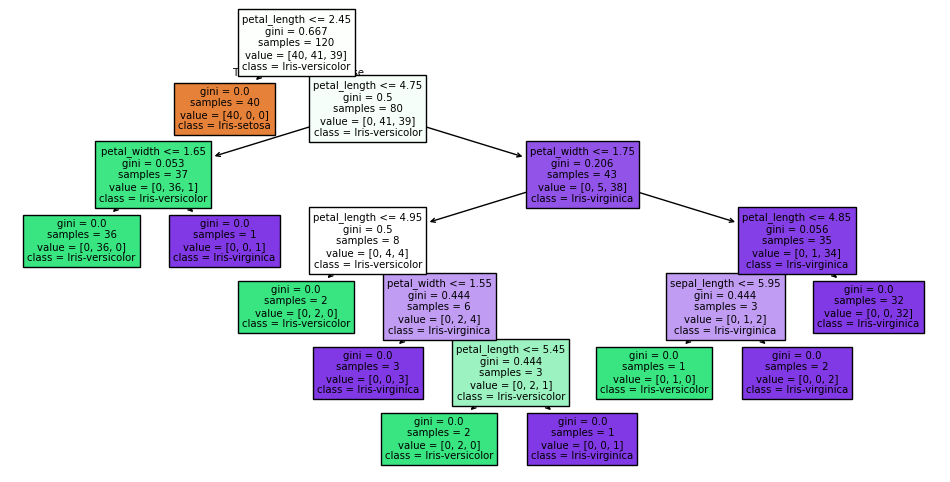

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert dict_values to a list for class_names
class_names = list(label_mapping.values())

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X_train.columns, class_names=class_names, filled=True)
plt.show()
